# IS 665 - FINAL PROJECT

## PREDICTING WHETHER TWEETS ARE ABOUT DISASTER OR NOT


### ABOUT DATASET
We have been given a tweets data set which contains the following columns

**Id:** unique number representing each tweet

**Keyword:** keyword from each tweets

**Location:** location from where the tweet is sent.

**text:** tweets

**target:** 1 - disaster, 0 - non-disaster

**Objective** : Predicting whether tweets are about real disaster or not. 

To accomplish this objective we need to perform text mining, NLP on the dataset. 

Basic steps involved when doing a analysis on a text data is: 
- Data Loading and EDA 
- Data Preprocessing
- Data Analysis (includes feature engineering and EDA)
- Data Modelling (selecting right model) 

## Exploratory Data Analysis

In [4]:
#importing necessary basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

#for text pre-processing
import re, string
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from collections import  Counter
from wordcloud import WordCloud

#for model-building
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec



In [5]:
#reading the input train data as a csv file
data = pd.read_csv('tweets_final_project_data.csv')

In [6]:
#checking first five rows of the input data
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
#displaying columns and number of entries, along with data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
#checking duplicate rows
data.duplicated().sum()

0

There are no duplicated rows.


In [9]:
#checking total number of null values
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

0    4342
1    3271
Name: target, dtype: int64


/Users/tanvi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='target'>

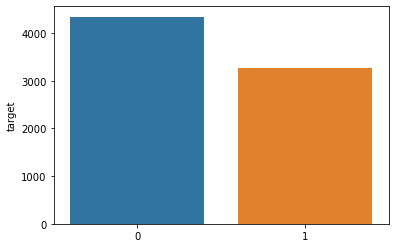

In [10]:
# class/ target distribution
x=data['target'].value_counts()
print(x)
sns.barplot(x.index,x)

Takeaway : Our target distribution is imbalanced, sure. But is it so imbalanced that we cannot use in our model, we don't think so.

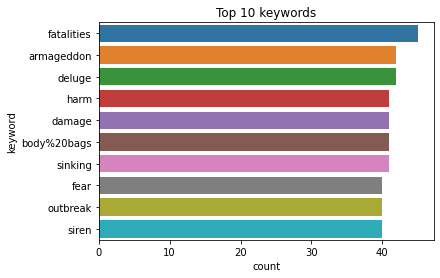

In [11]:
# Exploring Keywords and their distribution
sns.countplot(y=data.keyword, order = data.keyword.value_counts().iloc[:10].index)
plt.title('Top 10 keywords')
plt.show()

Let's see keywords in disaster and non disaster tweets

/Users/tanvi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tanvi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 keywords for non-disaster tweets')

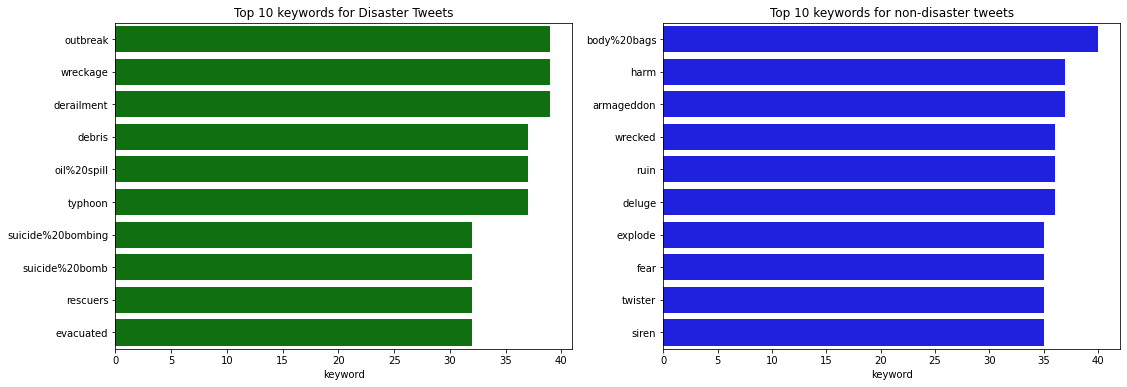

In [12]:
#plotting disaster and non disaster vs their value counts using seaborn
disaster = data[data['target']==1]
non_disaster = data[data['target']==0]

keywords_disaster = disaster.keyword.value_counts().head(10)
keywords_non_disaster = non_disaster.keyword.value_counts().head(10)

plt.figure(figsize=(18,6))
plt.subplot(121)
sns.barplot(keywords_disaster, keywords_disaster.index, color='g')
plt. title('Top 10 keywords for Disaster Tweets')

plt.subplot(122)
sns.barplot(keywords_non_disaster, keywords_non_disaster.index, color='b')
plt.title('Top 10 keywords for non-disaster tweets')


Lets explore 'Location' column in dataset

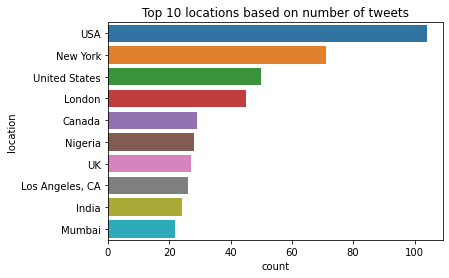

In [13]:
#plotting top 10 locations w.r.t number of tweets using seaborn
sns.countplot(y=data.location, order = data.location.value_counts().iloc[:10].index)
plt.title('Top 10 locations based on number of tweets')
plt.show()

- We can see that the 'location' data is not clean. It has countries and cities mixed with each other and there is no standardization

Number of words in Disaster tweets: 15.167532864567411
Number of words in Non-Disaster tweets: 14.704744357438969


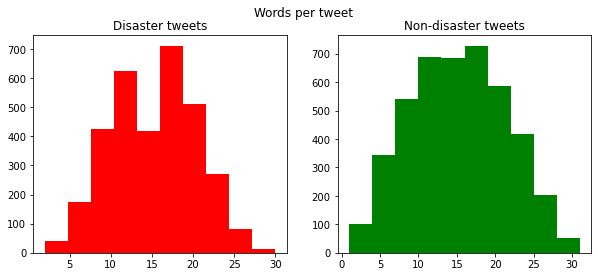

In [14]:
##Count number of words in a tweet
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))
print("Number of words in Disaster tweets:",data[data['target']==1]['word_count'].mean()) 
print("Number of words in Non-Disaster tweets:",data[data['target']==0]['word_count'].mean()) 


#Plot word-count per tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
df_train_words=data[data['target']==1]['word_count']
ax1.hist(df_train_words,color='red')
ax1.set_title('Disaster tweets')
df_train_words=data[data['target']==0]['word_count']
ax2.hist(df_train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Words per tweet')
plt.show()

Number of characters in Disaster tweets: 108.11342097217977
Number of characters in Non-Disaster tweets: 95.70681713496084


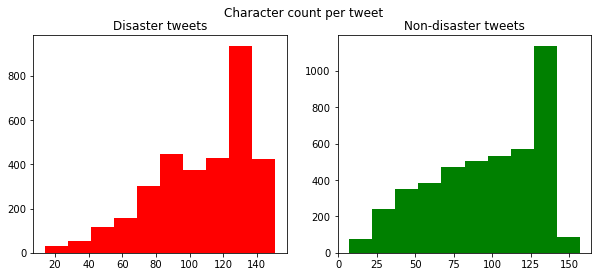

In [15]:
data['char_count'] = data['text'].apply(lambda x: len(str(x)))
print("Number of characters in Disaster tweets:",data[data['target']==1]['char_count'].mean()) 
print("Number of characters in Non-Disaster tweets:",data[data['target']==0]['char_count'].mean()) 

#Plot word-count per tweet
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
df_train_words=data[data['target']==1]['char_count']
ax1.hist(df_train_words,color='red')
ax1.set_title('Disaster tweets')
df_train_words=data[data['target']==0]['char_count']
ax2.hist(df_train_words,color='green')
ax2.set_title('Non-disaster tweets')
fig.suptitle('Character count per tweet')
plt.show()

In [16]:
# since these are tweets, lets see the top hashtags 
def hash_tags(text):
  return " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", text)]) or 'no'

hash_tags = data['text'].apply(lambda x: hash_tags(x))

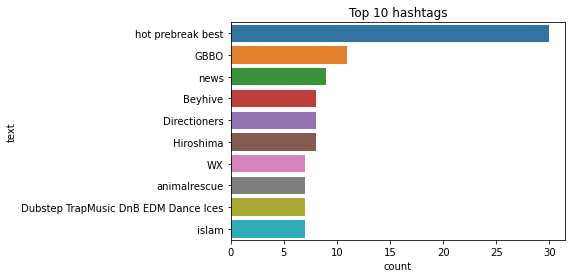

In [17]:
# Plotting the Top 10 hashtags using seaborn
sns.countplot(y=hash_tags, order=hash_tags.value_counts().iloc[1:11].index)
plt.title("Top 10 hashtags")
plt.show()

In [18]:
#using corpus nltk function to create corpus functions
def create_corpus(target):
    corpus=[]
    for x in data[data['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [19]:
#using corpus nltk function to create corpus functions
def create_corpus_df(tweet, target):
    corpus=[]
    for x in data[data['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 20 artists>

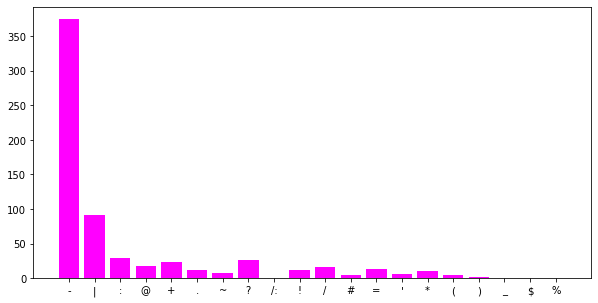

In [20]:
#Plotting Punctuations in non-disaster class using matplotlib
plt.figure(figsize=(10,5))
corpus = create_corpus(0)
dic = defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y=zip(*dic.items())
plt.bar(x, y,color='magenta')

<BarContainer object of 18 artists>

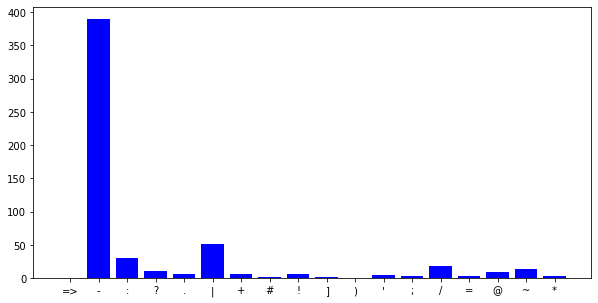

In [21]:
#Plotting Punctuations in disaster class using matplotlib
plt.figure(figsize=(10,5))
corpus = create_corpus(1)
dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y = zip(*dic.items())
plt.bar(x, y, color='blue')

[nltk_data] Downloading package stopwords to /Users/tanvi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<AxesSubplot:>

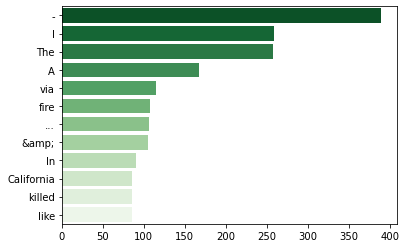

In [22]:
#downloading english stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
#plotting Common words vs their value counts using seaborn
counter = Counter(corpus)
most = counter.most_common()
x=[]
y=[]
for word, count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y, y=x, palette='Greens_r')

In [23]:
#checking number of unique words in both types of tweets
data['unique_word_count'] = data['text'].apply(lambda x: len(set(str(x).split())))
print("Number of unique words in Disaster tweets:",data[data['target']==1]['unique_word_count'].mean()) 
print("Number of unique words in Non-Disaster tweets:",data[data['target']==0]['unique_word_count'].mean()) 

Number of unique words in Disaster tweets: 14.664934270865178
Number of unique words in Non-Disaster tweets: 14.09649930907416


## Feature Engineering

Now that we know what our data looks like, we'll start feature engineering using NLP.
- To NLP in python we have import NLTK library, which gets information from our text to a data which can used in modelling.

**STEPS IN PERFORMING ANALYSIS ON TEXT DATA**
- Data Cleaning : we did this with the help of function 'preprocess'
- Tokenization : we used function word_tokenize() 
- Removing stopwords : NLTK library contains stopwords of all languages
- Stemming : SnowballStemmer()
- Lemmatization : WordNetLemmatizer() 

In [24]:
#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #remove leading/trailing whitespace 
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing hyperlinks
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. 
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    return text

In [25]:
#downloading nltk libraries 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/tanvi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tanvi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/tanvi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
#define stopword function for strings
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [27]:
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)

Reason behind using snowball stemmer instead if porter stemmer is that snowball stemmer is more aggressive and latest version. Also snowball stemmer gives more meaningful results than porter stemmer, for example if we pass words 'fairly' and 'sportingly' to porter stemmer it returns words 'fairli' and 'sportingli' while snowball stemmer returns 'fair' and 'sport' 

In [28]:
#create a lemmatizer
wl = WordNetLemmatizer()
 
# Helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ # to get tags of adjectives
    elif tag.startswith('V'):
        return wordnet.VERB # to get tags of verbs
    elif tag.startswith('N'):
        return wordnet.NOUN # nouns
    elif tag.startswith('R'):
        return wordnet.ADV # adverbs
    else:
        return wordnet.NOUN

def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [29]:
#Checking the first five rows of the table and the new column cleaned text 
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string))) 
data['clean_text'] = data['text'].apply(lambda x: finalpreprocess(x)) # applying all the functions we created above 
data.head()

,id,keyword,location,text,target,word_count,char_count,unique_word_count,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,13,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,7,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,20,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,8,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,15,get sent photo ruby alaska smoke wildfires pou...


### **Now that we have cleaned the tweet data let's do some more EDA**

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

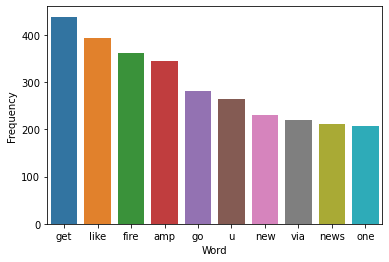

In [30]:
#checking value counts of common words
f = Counter(" ".join(data['clean_text']).split()).most_common(10) # tokenization and getting top 10 words
frequent = pd.DataFrame(f, columns=['Word', 'Frequency'])
sns.barplot(x=frequent.Word, y=frequent.Frequency)

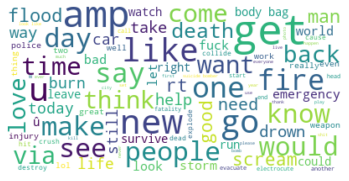

In [31]:
# word cloud distribution
texts = " ".join(i for i in data.clean_text)
wc = WordCloud(max_words=100,background_color= "white", max_font_size=50, stopwords=stop)
wc.generate(texts)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

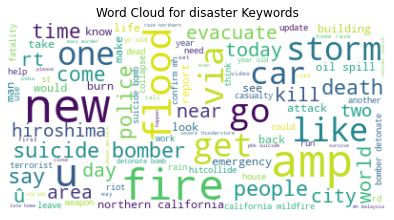

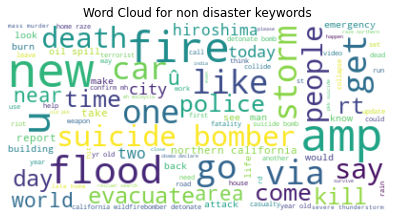

In [32]:
#checking distribution of disaster and non disaster tweets using matplotlib
disaster_text = " ".join(i for i in data[data['target']==1].clean_text)
wc = WordCloud(max_words=100,background_color= "white", max_font_size=50, stopwords=stop)
wc.generate(disaster_text)
plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for disaster Keywords')
plt.show()

non_disaster_text = " ".join(i for i in data[data['target']==0].clean_text)
wc = WordCloud(max_words=100,background_color= "white", max_font_size=50, stopwords=stop)
wc.generate(disaster_text)
plt.figure(figsize=(15, 15))
plt.subplot(122)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for non disaster keywords')
plt.show()

In [33]:
unigrams = (
    data['clean_text'].str.lower()
                .str.replace(r'[^a-z\s]', '')
                .str.split(expand=True)
                .stack())
# generate bigrams by concatenating unigram columns
bigrams = unigrams + ' ' + unigrams.shift(-1)
# generate trigrams by concatenating unigram and bigram columns
trigrams = bigrams + ' ' + unigrams.shift(-2)

# store in a dataframe
bigram = pd.DataFrame(bigrams)
trigram = pd.DataFrame(trigrams)

<ipython-input-33-21c5cea753aa>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_text'].str.lower()


In [34]:
# most frequent bigrams
bigram.value_counts()[:10]

body bag               75
suicide bomber         60
look like              55
gon na                 43
youtube video          43
like youtube           42
northern california    41
cross body             40
burn building          40
oil spill              39
dtype: int64

In [35]:
# most frequent trigrams
trigram.value_counts()[:10]

like youtube video              42
suicide bomber detonate         30
northern california wildfire    29
pkk suicide bomber              28
late home raze                  28
home raze northern              28
bomber detonate bomb            28
old pkk suicide                 27
raze northern california        27
yr old pkk                      27
dtype: int64

## Data Modelling

For Modelling we've found that 'Multinomial Naive Bayes' is giving more accuracy.

we choose this model because it uses TF-IDF score which clearly gives more meaning to each word than using integer count of each word, which is used in other models.



- We have been asked to randomly split the dataset into 90% training and 10% testing.
- And then run it 10 times. 
- Each time we run our model we displayed the result and then stored it in a array.
- After running 10 times we then took average of the score array to get final average score.

**WE ARE USING TWO METHODS TO DO RANDOM SPLITTING OF DATASET**
- Using train_test_split
- KFold

In [36]:
#splitting data randomly 10 times, and checking accuracy score each time, and taking the average
# shuffle = True, that means data is shuffled before splitting.
score=[]
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(data["clean_text"],data["target"],test_size=0.1,shuffle=True) 
    X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
    X_test_tok= [nltk.word_tokenize(i) for i in X_test]
    #TF-IDF
    # Convert x_train to vector since model can only run on numbers and not words- Fit and transform
    tfidf_vectorizer = TfidfVectorizer(use_idf=True)
    #tfidf runs on non-tokenized sentences unlike word2vec
    X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
    # Only transform x_test (not fit and transform)
    X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test)

    ## Classification Model using Naive Bayes(tf-idf)
    nb_tfidf = MultinomialNB()
    nb_tfidf.fit(X_train_vectors_tfidf, y_train)  

    #Predict y value for test dataset
    y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
    y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

    print(classification_report(y_test,y_predict)) # gives summary of precision, recall, f1-score, support
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_predict))
 
    fpr, tpr, thresholds = roc_curve(y_test, y_prob) # gives false positive rates, true positive rates and thresholds between fpr and tpr
    r = auc(fpr, tpr)
    score.append(r)
    print('AUC:', r)

print('average: ', np.average(score)) # getting average score. 

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       455
           1       0.83      0.68      0.75       307

    accuracy                           0.81       762
   macro avg       0.82      0.79      0.80       762
weighted avg       0.82      0.81      0.81       762

Confusion Matrix:
[[412  43]
 [ 98 209]]
AUC: 0.8792891147940006
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       422
           1       0.84      0.71      0.77       340

    accuracy                           0.81       762
   macro avg       0.82      0.80      0.80       762
weighted avg       0.81      0.81      0.81       762

Confusion Matrix:
[[377  45]
 [ 99 241]]
AUC: 0.8501393922497908
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       444
           1       0.80      0.69      0.74       318

    accuracy                           0.80       76

- **Getting average score around 85.8 % - 86.5 %**

**USING KFOLD**

In [37]:
score_kfold=[]
X = data['clean_text']
y = data['target']
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
  print("Train Index: ", train_index, "\n")
  print("Test Index: ", test_index) # to check random splitting
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
  X_test_tok= [nltk.word_tokenize(i) for i in X_test]
    #TF-IDF
    # Convert x_train to vector since model can only run on numbers and not words- Fit and transform
  tfidf_vectorizer = TfidfVectorizer(use_idf=True)
    #tfidf runs on non-tokenized sentences unlike word2vec
  X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
    # Only transform x_test (not fit and transform)
  X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test)

    ## Classification Model using Naive Bayes(tf-idf)
  nb_tfidf = MultinomialNB()
  nb_tfidf.fit(X_train_vectors_tfidf, y_train)  

    #Predict y value for test dataset
  y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
  y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]

  print(classification_report(y_test,y_predict))
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_predict))
 
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  r = auc(fpr, tpr)
  score_kfold.append(r)
  print('AUC:', r)

print('average: ', np.average(score_kfold))

Train Index:  [   0    1    2 ... 7609 7610 7611] 

Test Index:  [  19   23   31   37   41   48   50   56   61   65   69   73   79   87
   91   95  101  106  132  167  168  169  176  177  179  185  199  217
  222  230  233  239  245  251  263  308  318  319  321  332  334  349
  354  367  381  393  408  429  435  445  453  457  465  468  472  486
  496  503  509  511  518  538  544  554  576  586  601  625  642  676
  683  694  706  711  733  736  737  742  743  748  763  773  786  789
  800  811  828  852  856  858  866  879  908  932  957  965  970  982
  996 1017 1022 1025 1027 1034 1041 1042 1046 1056 1057 1074 1078 1084
 1087 1103 1128 1129 1142 1144 1153 1168 1174 1175 1176 1188 1199 1242
 1253 1261 1263 1277 1295 1297 1302 1315 1320 1321 1322 1328 1374 1383
 1410 1412 1414 1419 1420 1430 1452 1465 1467 1480 1488 1501 1507 1511
 1515 1536 1554 1566 1569 1595 1606 1608 1616 1618 1623 1656 1662 1672
 1677 1721 1728 1730 1731 1732 1737 1758 1765 1782 1783 1786 1790 1807
 1811 1817 1

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       448
           1       0.81      0.71      0.76       314

    accuracy                           0.81       762
   macro avg       0.81      0.80      0.80       762
weighted avg       0.81      0.81      0.81       762

Confusion Matrix:
[[395  53]
 [ 91 223]]
AUC: 0.8570539979526843
Train Index:  [   0    1    2 ... 7610 7611 7612] 

Test Index:  [  15   26   29   33   44   45   51   57   59   63   75   90  102  110
  122  124  135  144  181  184  210  227  240  252  257  259  268  279
  290  293  297  303  315  325  333  344  347  371  380  387  410  414
  420  422  426  434  438  439  443  452  462  479  527  530  533  553
  555  558  565  577  584  589  598  599  605  626  640  641  652  654
  655  662  665  677  691  693  705  710  730  746  751  783  787  794
  799  805  807  808  809  810  834  847  864  880  893  907  911  926
  931  940  947  958  964  969  977  981 1003 

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       430
           1       0.84      0.63      0.72       331

    accuracy                           0.79       761
   macro avg       0.80      0.77      0.77       761
weighted avg       0.80      0.79      0.78       761

Confusion Matrix:
[[390  40]
 [122 209]]
AUC: 0.8429284058174665
Train Index:  [   0    1    2 ... 7609 7611 7612] 

Test Index:  [  25   32   39   49   68   82   83   85   99  103  104  111  112  118
  139  150  152  166  170  174  175  180  191  194  205  211  212  214
  218  220  270  274  278  283  289  300  305  309  312  314  326  330
  348  356  360  366  368  383  389  397  402  433  450  451  461  463
  480  483  489  490  493  494  495  508  516  517  540  551  568  579
  594  602  615  617  618  643  650  658  664  668  674  680  684  690
  700  708  719  725  739  744  758  759  777  816  820  841  843  859
  862  868  869  871  873  883  887  890  945 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       425
           1       0.87      0.72      0.79       336

    accuracy                           0.83       761
   macro avg       0.84      0.82      0.83       761
weighted avg       0.84      0.83      0.83       761

Confusion Matrix:
[[390  35]
 [ 93 243]]
AUC: 0.8837570028011205
Train Index:  [   0    1    2 ... 7610 7611 7612] 

Test Index:  [  11   20   22   35   42   72   78   97  128  140  147  162  163  204
  226  237  243  261  282  313  340  343  359  361  363  365  369  370
  372  377  392  398  399  405  406  407  424  440  444  448  456  460
  464  475  482  521  522  541  542  546  560  572  581  593  597  610
  630  631  632  649  651  685  689  697  702  703  707  714  735  767
  772  780  781  788  819  821  836  840  845  850  855  867  874  875
  882  900  905  916  961  962  986 1000 1004 1011 1013 1014 1019 1026
 1031 1037 1048 1067 1072 1080 1091 1100 1124 

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       422
           1       0.82      0.69      0.75       339

    accuracy                           0.80       761
   macro avg       0.80      0.79      0.79       761
weighted avg       0.80      0.80      0.79       761

Confusion Matrix:
[[371  51]
 [104 235]]
AUC: 0.8575472885123516
Train Index:  [   0    1    2 ... 7610 7611 7612] 

Test Index:  [   3    5    9   54   55   66   77   94  117  125  126  133  137  164
  201  223  224  232  235  242  249  255  260  280  285  302  320  327
  341  345  357  362  364  375  384  385  388  404  419  455  467  470
  477  499  504  510  513  523  525  536  539  603  638  645  666  667
  671  673  688  713  716  722  723  760  768  770  774  793  797  814
  822  823  827  832  846  872  894  899  901  914  918  919  922  924
  928  943  946  950  951  966  984  989  992 1063 1065 1077 1118 1120
 1141 1145 1155 1160 1169 1202 1205 1214 1217 

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       419
           1       0.83      0.70      0.76       342

    accuracy                           0.80       761
   macro avg       0.81      0.79      0.79       761
weighted avg       0.80      0.80      0.80       761

Confusion Matrix:
[[371  48]
 [104 238]]
AUC: 0.8599631537076583
average:  0.8576422294710249


As you can observe the data is randomly getting splitted, for each fold data is randomly selecting 6852 tuples of 'X' for training and 761 tuples for testing. We have given indexes to show it is random.

- **Getting average score around 85.8 % - 87.2 %**

In [38]:
print('Average Score using train_test_split: ', np.average(score) * 100, '%')
print('Average Score using KFold: ', np.average(score_kfold) * 100, '%')

Average Score using train_test_split:  85.88456119463638 %
Average Score using KFold:  85.76422294710248 %
